In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from xmitgcm import open_mdsdataset
import xgcm
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (16,12)
plt.rcParams['image.cmap'] = 'RdBu_r'
plt.rcParams['image.origin'] = 'lower'

In [3]:
path = '/data/home/liutongya/RCLV/velocity/run_offline/run/'
ds1 = open_mdsdataset(path, prefix={'Diag_stat'}).chunk()
ds1

<xarray.Dataset>
Dimensions:  (XC: 3600, XG: 3600, YC: 1600, YG: 1600, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 9859)
Coordinates:
  * XC       (XC) >f4 0.05 0.15 0.25 0.35 0.45 ... 359.65 359.75 359.85 359.95
  * YC       (YC) >f4 -79.95 -79.85 -79.75 -79.65 ... 79.65 79.75 79.85 79.95
  * XG       (XG) >f4 -2.7755576e-17 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
  * YG       (YG) >f4 -80.0 -79.9 -79.8 -79.7 -79.6 ... 79.5 79.6 79.7 79.8 79.9
  * Z        (Z) >f4 -50.0
  * Zp1      (Zp1) >f4 0.0 -100.0
  * Zu       (Zu) >f4 -100.0
  * Zl       (Zl) >f4 0.0
    rA       (YC, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    dxG      (YG, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    dyG      (YC, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    rAz      (YG, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    dxC      (YC, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    dyC      (YG, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    rAw      (YC, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    rAs      (YG, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    drC      (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF   (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    hFacC    (YC, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    hFacW    (YC, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    hFacS    (YG, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    maskC    (YC, XC) bool dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    maskW    (YC, XG) bool dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    maskS    (YG, XC) bool dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:01 00:00:02 ... 02:44:18 02:44:19
Data variables:
    UVEL     (time, YC, XG) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    VVEL     (time, YG, XC) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    PhiVEL   (time, YC, XC) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    PsiVEL   (time, YG, XG) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>

In [4]:
grid = xgcm.Grid(ds1)
grid

<xgcm.Grid>
T Axis (periodic, boundary=None):
  * center   time
X Axis (periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
Y Axis (periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center
Z Axis (periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center

In [7]:
dyG = ds1['dyG']
dxG = ds1['dxG']
dxC = ds1['dxC']
dyC = ds1['dyC']
drF = ds1['drF']

maskC = ds1['hFacC']

In [6]:
psi = ds1['PsiVEL'][0, :, :]
psi

<xarray.DataArray 'PsiVEL' (YG: 1600, XG: 3600)>
dask.array<getitem, shape=(1600, 3600), dtype=float32, chunksize=(1600, 3600), chunktype=numpy.ndarray>
Coordinates:
  * XG       (XG) >f4 -2.7755576e-17 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
  * YG       (YG) >f4 -80.0 -79.9 -79.8 -79.7 -79.6 ... 79.5 79.6 79.7 79.8 79.9
    rAz      (YG, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    iter     int64 dask.array<chunksize=(), meta=np.ndarray>
    time     timedelta64[ns] 00:00:01
Attributes:
    standard_name:  PsiVEL
    long_name:      Horizontal Velocity Stream-Function
    units:          m.m^2/s
    mate:           PhiVEL

In [9]:
phi = ds1['PhiVEL'][0, :, :]
phi = phi.where(maskC!=0)
phi

<xarray.DataArray 'PhiVEL' (YC: 1600, XC: 3600)>
dask.array<where, shape=(1600, 3600), dtype=float32, chunksize=(1600, 3600), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 0.05 0.15 0.25 0.35 0.45 ... 359.65 359.75 359.85 359.95
  * YC       (YC) >f4 -79.95 -79.85 -79.75 -79.65 ... 79.65 79.75 79.85 79.95
    rA       (YC, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    hFacC    (YC, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    maskC    (YC, XC) bool dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    iter     int64 dask.array<chunksize=(), meta=np.ndarray>
    time     timedelta64[ns] 00:00:01
Attributes:
    standard_name:  PhiVEL
    long_name:      Horizontal Velocity Potential (m^2/s)
    units:          m^2/s
    mate:           UVELMASS

In [17]:
# non-divergent velocity
# u = - d psi / dy
# v = d psi / dx

u_psi = -(np.roll(psi, -1, axis=0) - psi) / grid.interp(dyG, 'Y') / drF
v_psi =  (np.roll(psi, -1, axis=1) - psi) / grid.interp(dxG, 'X') / drF

In [22]:
# psi is weighted by cell thickness buy phi is not!
# alternate way to get non-divergent velocity

u_phi = (phi - np.roll(phi, 1, axis=-1)) / grid.interp(dxG, 'Y') # / drF
v_phi = (phi - np.roll(phi, 1, axis=-2)) / grid.interp(dyG, 'X') # / drF

u_nd = (ds1.UVEL[0, :, :] - grid.interp(u_phi, 'X')).fillna(0)
v_nd = (ds1.VVEL[0, :, :] - grid.interp(u_phi, 'Y')).fillna(0)

## psi and phi

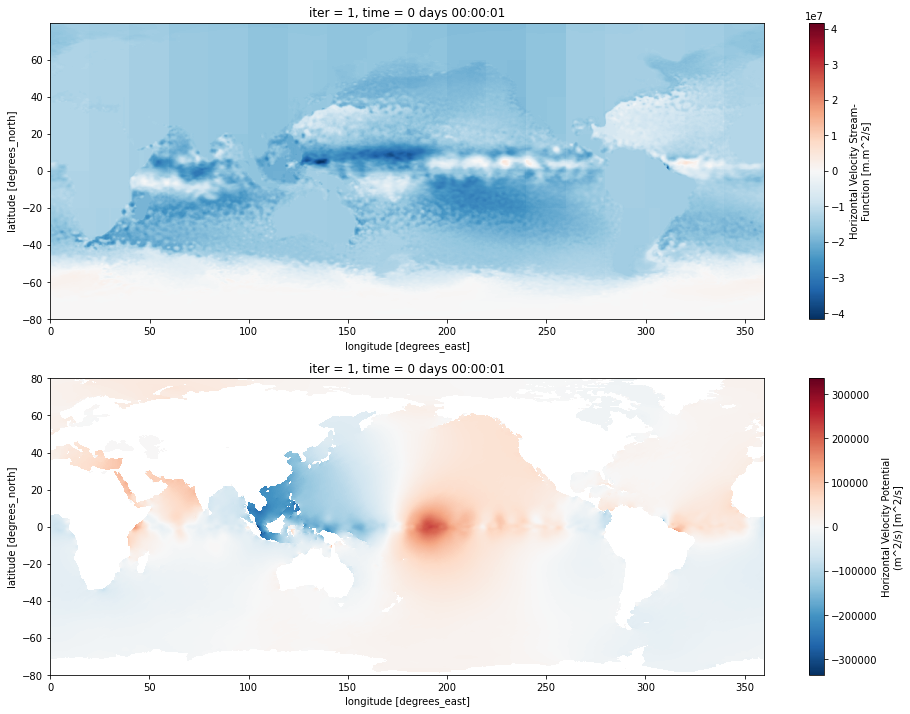

In [25]:
# psi and phi
plt.subplot(211)
psi.plot()

plt.subplot(212)
phi.plot()

## u_psi and v_psi

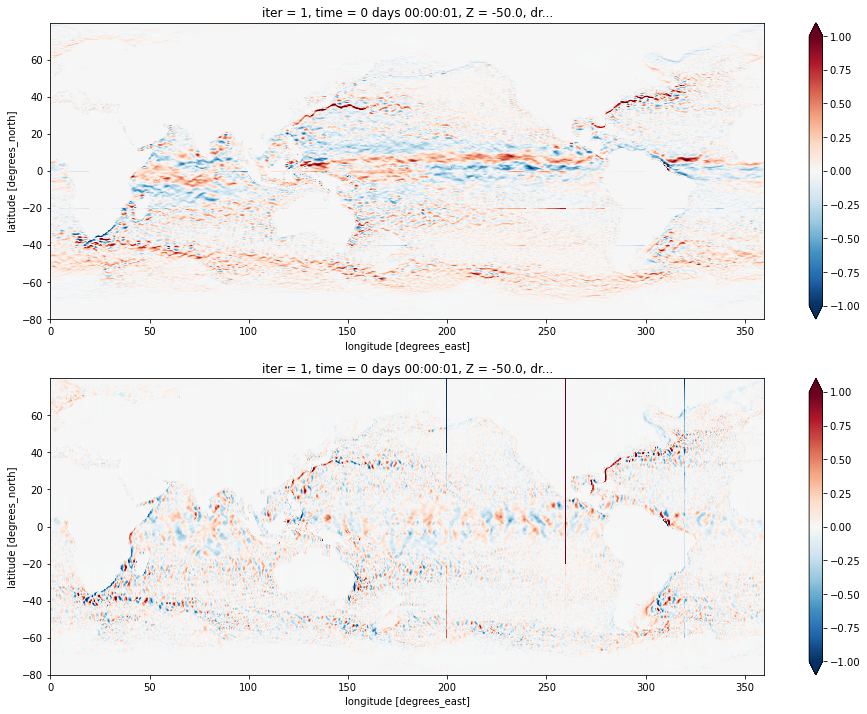

In [26]:
# u psi and v psi
plt.subplot(211)
u_psi.plot(vmin=-1, vmax=1, cmap='RdBu_r')

plt.subplot(212)
v_psi.plot(vmin=-1, vmax=1, cmap='RdBu_r')

## u_nd and v_nd

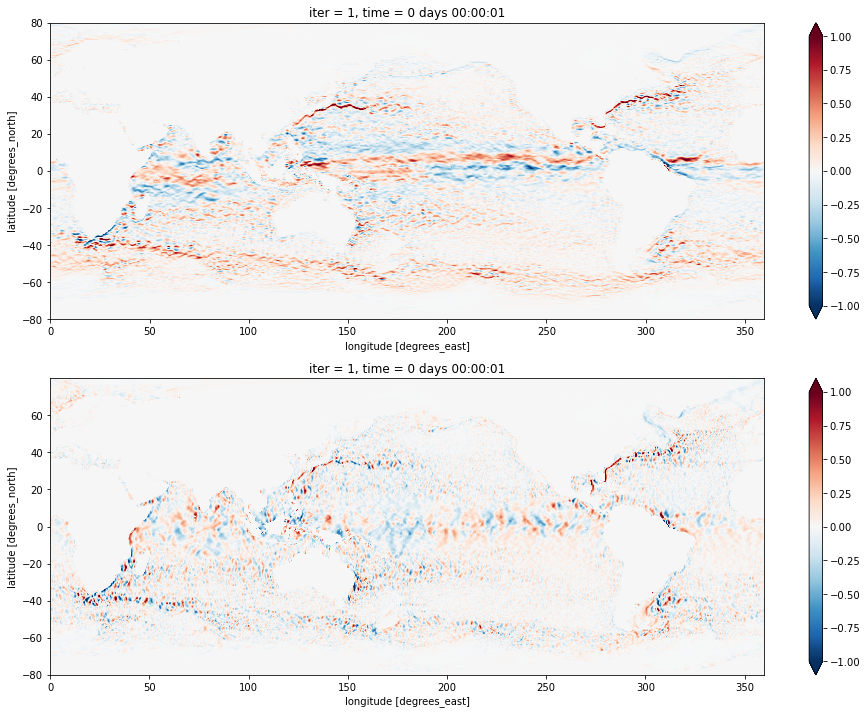

In [27]:
# u nd and v nd
plt.subplot(211)
u_nd.plot(vmin=-1, vmax=1, cmap='RdBu_r')

plt.subplot(212)
v_nd.plot(vmin=-1, vmax=1, cmap='RdBu_r')

## u ori - u_psi

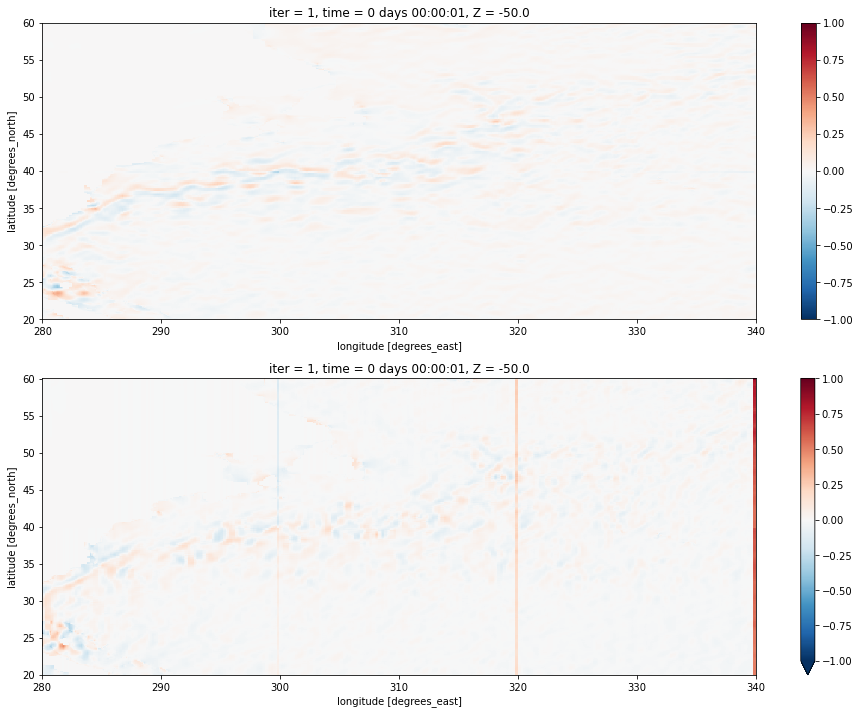

In [34]:
du1 = ds1.UVEL[0, :, :] - grid.interp(u_psi, 'Y')
dv1 = ds1.VVEL[0, :, :] - grid.interp(v_psi, 'X')

plt.subplot(211)
du1.sel(XG=slice(280, 340), YC=slice(20, 60)).plot(vmin=-1, vmax=1, cmap='RdBu_r')

plt.subplot(212)
dv1.sel(XC=slice(280, 340), YG=slice(20, 60)).plot(vmin=-1, vmax=1, cmap='RdBu_r')

## u ori - u nd

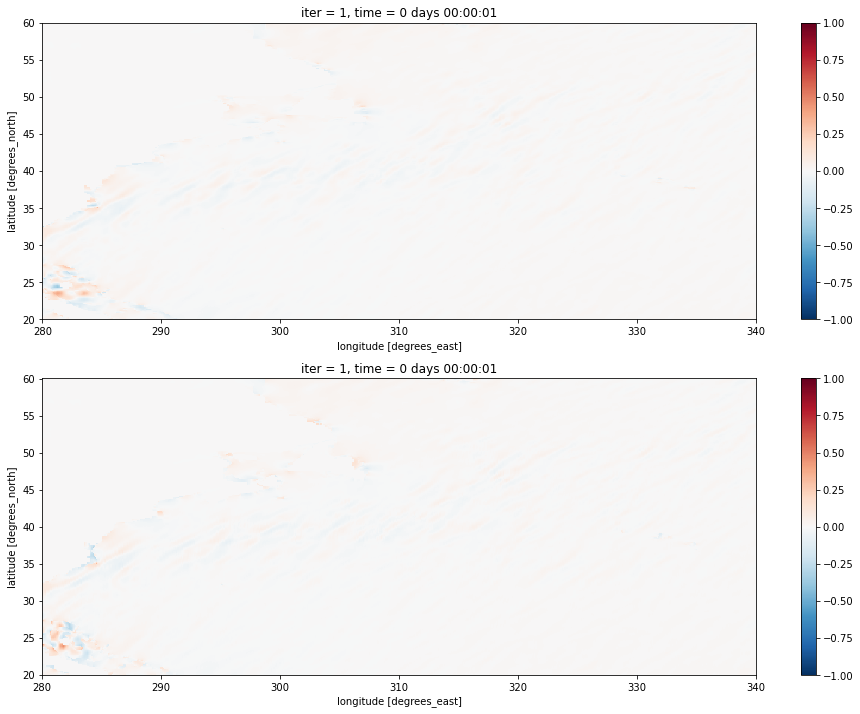

In [38]:
du2 = ds1.UVEL[0, :, :] - u_nd
dv2 = ds1.VVEL[0, :, :] - v_nd

plt.subplot(211)
du2.sel(XG=slice(280, 340), YC=slice(20, 60)).plot(vmin=-1, vmax=1, cmap='RdBu_r')

plt.subplot(212)
dv2.sel(XC=slice(280, 340), YG=slice(20, 60)).plot(vmin=-1, vmax=1, cmap='RdBu_r')

- u psi and u nd both have obvious differences with u ori, especially for u psi.
- For Ryan's result, the velocity correction is close to zero in the open ocean.
- Ryan's code: https://github.com/liutongya/mitgcm_2D_global/blob/master/notebooks/correction.ipynb